# Modelos de regresión

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
# Generar datos no lineales
np.random.seed(0)
X = np.linspace(-3, 3, 200).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # seno con ruido

# Modelo lineal (hiperplano en 1D)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_lin_pred = lin_reg.predict(X)
r2_lin = r2_score(y, y_lin_pred)

# MLP con una capa oculta
mlp_1 = MLPRegressor(hidden_layer_sizes=(50,), activation="relu",
                     max_iter=5000, random_state=0)
mlp_1.fit(X, y)
y_mlp1_pred = mlp_1.predict(X)
r2_mlp1 = r2_score(y, y_mlp1_pred)

# MLP con dos capas ocultas
mlp_2 = MLPRegressor(hidden_layer_sizes=(50, 50), activation="relu",
                     max_iter=5000, random_state=0)
mlp_2.fit(X, y)
y_mlp2_pred = mlp_2.predict(X)
r2_mlp2 = r2_score(y, y_mlp2_pred)

# Imprimir resultados de R²
print("R² regresión lineal:", r2_lin)
print("R² MLP 1 capa oculta:", r2_mlp1)
print("R² MLP 2 capas ocultas:", r2_mlp2)



R² regresión lineal: 0.6423871473211313
R² MLP 1 capa oculta: 0.9251342942775471
R² MLP 2 capas ocultas: 0.9686890596011678


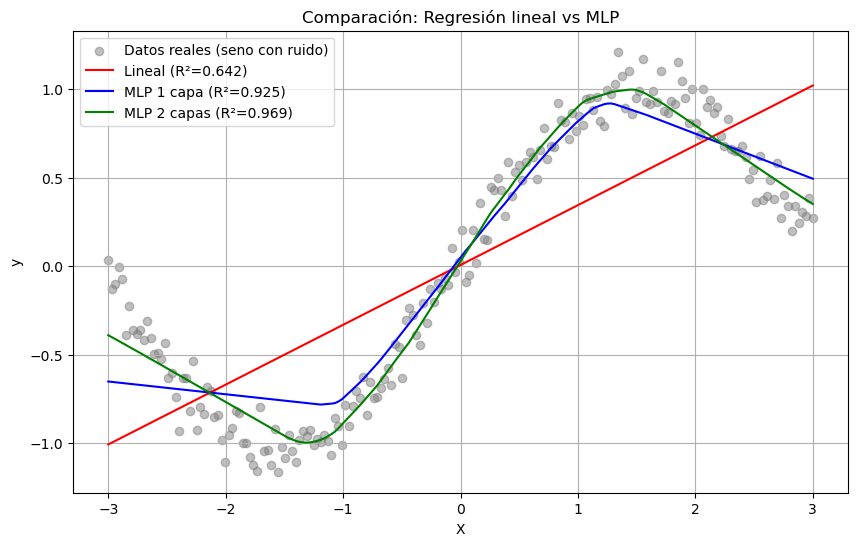

In [4]:
# Graficar resultados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="gray", alpha=0.5, label="Datos reales (seno con ruido)")
plt.plot(X, y_lin_pred, color="red", label=f"Lineal (R²={r2_lin:.3f})")
plt.plot(X, y_mlp1_pred, color="blue", label=f"MLP 1 capa (R²={r2_mlp1:.3f})")
plt.plot(X, y_mlp2_pred, color="green", label=f"MLP 2 capas (R²={r2_mlp2:.3f})")
plt.title("Comparación: Regresión lineal vs MLP")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

### MLPRegressor con distintas funciones de activación

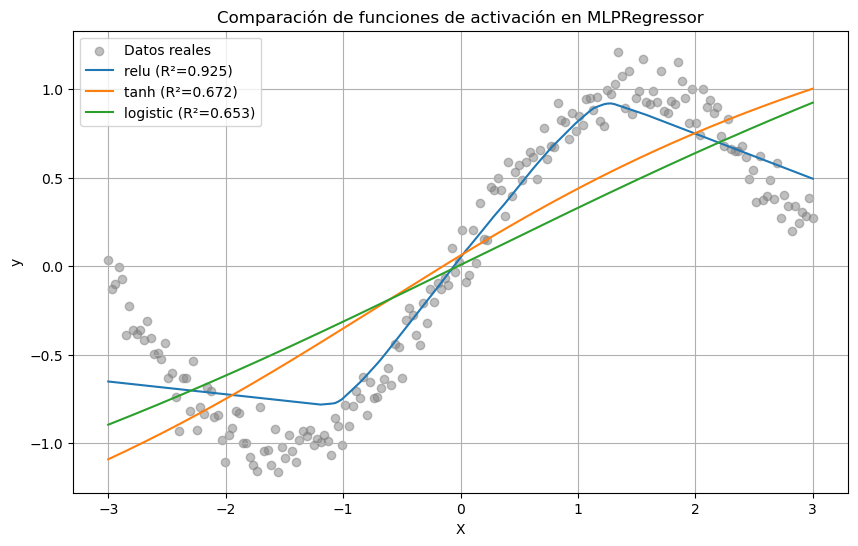

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Datos no lineales: seno con ruido
np.random.seed(0)
X = np.linspace(-3, 3, 200).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Definir funciones de activación a comparar
activations = ["relu", "tanh", "logistic"]  # logistic = sigmoid en sklearn
results = {}

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="gray", alpha=0.5, label="Datos reales")

for act in activations:
    mlp = MLPRegressor(hidden_layer_sizes=(50,), activation=act,
                       max_iter=5000, random_state=0)
    mlp.fit(X, y)
    y_pred = mlp.predict(X)
    r2 = r2_score(y, y_pred)
    results[act] = r2
    plt.plot(X, y_pred, label=f"{act} (R²={r2:.3f})")

plt.title("Comparación de funciones de activación en MLPRegressor")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



In [7]:
# Mostrar resultados en consola
for act, r2 in results.items():
    print(f"R² con activación {act}: {r2:.3f}")


R² con activación relu: 0.925
R² con activación tanh: 0.672
R² con activación logistic: 0.653
